### Numpy, Pandas, and Scipy Tutorial

Jay Urbain, PhD

1/19/2017

Numpy forms the basis of Scipy statistical operations, Pandas dataframes, Scikit-learn, many Deep Learning frameworks.   
- Central object: Numpy array 
- Not like a Java or C++ array 
- Like a vector/matrix 
- Can add, subtract, multiply, etc. 
- Optimized for speed 
- Built in matrix operations: product, inverse, determinant, solving linear systems of equations 

Prerequisite: 
- Vectors and matrices  
- Linear algebra basics 
- Gaussian distribution in 1D and 2D  
- Basic Python  

Installation:
- Download and install the Anaconda Python distribution.
- Developed using Python 3.5 

#### Getting help

? - intro and overview of Pythons features  
%quickref - Quick reference  
help - Python's help system  
object? - Details about 'object', use 'object??' or extra information  
desc(object) - Describe object  

#### Lists versus Numpy Arrays

In [3]:
import numpy as np

# Python list
L = [1,2,3]

# Numpy array
A = np.array([1,2,3])

print("List:")
for i in L:
    print(i)
print(type(L)) 

print("Array:")
for i in A:
    print(i)   
print(type(A)) 

List:
1
2
3
<class 'list'>
Array:
1
2
3
<class 'numpy.ndarray'>


In [4]:
# Append elements to a list
L2 = []
print("List:")
for i in L:
    L2.append(i + i)
    
print("L2: ", L2)

# Adding 2 numpy arrays
print("A+A: ", A+A)

# Elementwise multiplication in numpy arrays
print("2*A: ", 2*A)

# be careful doing doing this with a list, get concatenation
print("2*L: ", 2*L)

List:
L2:  [2, 4, 6]
A+A:  [2 4 6]
2*A:  [2 4 6]
2*L:  [1, 2, 3, 1, 2, 3]


In [5]:
# This will cause an ERROR - no numpy append
A.append([1,2,3])

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [6]:
# Appending a list to a list
L = L + [4,5]
L

[1, 2, 3, 4, 5]

In [8]:
L2 = []
print("L^2:")
for i in L:
    L2.append(i * i)
L2

L^2:


[1, 4, 9, 16, 25]

In [10]:
# Elementwise operations on numpy array
A**2

array([1, 4, 9])

In [11]:
np.sqrt(A)

array([ 1.        ,  1.41421356,  1.73205081])

In [12]:
np.log(A)

array([ 0.        ,  0.69314718,  1.09861229])

In [13]:
np.exp(A)

array([  2.71828183,   7.3890561 ,  20.08553692])

#### Numpy array is element wise. With list you have to start with an empty list, and use a for loop and append. For loops in Python are very slow.

Dot product:  
$a \cdot b = a^Tb = \sum_{d=1}^{D}a_db_d$

Note: Vectors are column vectors by default.

Dot product:  
$a \cdot b = |a||b| cos\theta_{ab}$ 


Cosine:  
$cos\theta_{ab} = \dfrac{a^Tb}{|a||b|} $ 

In [16]:
# dot product with lists

a = [1,2]
b = [2,3]

# zip make an iterator that aggregates elements from each of the iterables.
# I.e., lists
dotprod = 0
for e,f in zip(a,b):
    print(e,f)
    dotprod += e*f
dotprod

1 2
2 3


8

In [17]:
# dot product with numpy, like lists
an = np.array(a)
bn = np.array(b)
dotprod = 0
for e,f in zip(an,bn):
    dotprod += e*f
dotprod

8

In [18]:
# dot product with numpy as vector
an.dot(bn)

8

In [19]:
# dot product alternative with numpy as vector
np.dot(an,bn)

8

In [20]:
# magnitude of vector an
an_mag = np.sqrt( (an*an).sum()) 
an_mag

2.2360679774997898

In [21]:
# magnitude of vector an using linear algebra package
an_mag = np.linalg.norm(an) 
an_mag

2.2360679774997898

In [22]:
# cosine angle
cos_angle = an.dot(bn)/( np.linalg.norm(an) * np.linalg.norm(bn))
cos_angle

0.99227787671366774

In [23]:
angle = np.arccos( cos_angle )
angle

0.12435499454676072

#### Speed comparison

dt1 = time using slow loop-based dot product  
dt2 = time using fast vector-based dot product

In [24]:
import numpy as np
from datetime import datetime

a = np.random.randn(100)
b = np.random.randn(100)
T = 100000

def slow_dot_product(a, b):
	result = 0
	for e, f in zip(a, b):
		result += e*f
	return result

t0 = datetime.now()
for t in range(T):
	slow_dot_product(a, b)
dt1 = datetime.now() - t0

t0 = datetime.now()
for t in range(T):
	a.dot(b)
dt2 = datetime.now() - t0

print ("dt1 / dt2:", dt1.total_seconds() / dt2.total_seconds() )

dt1 / dt2: 22.80821341868634


Numpy is ~25x faster than for loop

#### Matrices

Matrix is 2d array or list of list  
1st index is row, second index is column  

In [27]:
# numpy
M = np.array([[1,2], [3,4]])
print(M)
print( type(M) )
print()

# list
L = [[1,2], [3,4]]
print(L)
print(type(L))

[[1 2]
 [3 4]]
<class 'numpy.ndarray'>

[[1, 2], [3, 4]]
<class 'list'>


In [28]:
L[0]

[1, 2]

In [29]:
L[0][0]

1

In [30]:
M[0][0]

1

In [31]:
# matrix is 2D numpy array, vector is 1D numpy array
M2 = np.matrix([[1,2], [3,4]])
print(M2)
print(type(M2))

[[1 2]
 [3 4]]
<class 'numpy.matrixlib.defmatrix.matrix'>


In [32]:
M2

matrix([[1, 2],
        [3, 4]])

In [34]:
A = np.array(M2)
print( type(A) )
A

<class 'numpy.ndarray'>


array([[1, 2],
       [3, 4]])

#### Generating matrices to work with

In [38]:
np.array( [1,2,3] )

array([1, 2, 3])

In [39]:
Z = np.zeros(10)
Z

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [40]:
Z = np.zeros((10,10)) # need to supply a tuple
Z

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

#### Random distribution

In [41]:
R = np.random.random((10,10))
R

array([[ 0.80879751,  0.09144886,  0.82181633,  0.38350593,  0.05382814,
         0.85927094,  0.44330073,  0.2546215 ,  0.30286728,  0.52619926],
       [ 0.95235671,  0.32227464,  0.41798268,  0.10803749,  0.65168446,
         0.82622834,  0.90289106,  0.97039556,  0.74408621,  0.66387881],
       [ 0.62183713,  0.70445808,  0.21247959,  0.0275649 ,  0.17488929,
         0.325545  ,  0.51910445,  0.36771899,  0.83984294,  0.26083319],
       [ 0.13923799,  0.47717142,  0.06483071,  0.60695849,  0.23692311,
         0.38247818,  0.9543118 ,  0.308477  ,  0.13573952,  0.81230121],
       [ 0.82146229,  0.72382711,  0.56891224,  0.11928118,  0.81780709,
         0.65845394,  0.97027745,  0.38443549,  0.88518144,  0.30997763],
       [ 0.51102574,  0.04420734,  0.89606438,  0.58478255,  0.25151041,
         0.53727737,  0.01138309,  0.27991164,  0.54618755,  0.0742184 ],
       [ 0.82851176,  0.16743913,  0.7536302 ,  0.34164457,  0.14069697,
         0.8924065 ,  0.76855348,  0.85068967

#### Gaussian distribution

*Note: Gaussian distribution has 2 parameters, mean and variance. When there is zero mean and unit variance the Gaussian distribution becomes normal otherwise it is a Gaussian distribution.*

In [42]:
G = np.random.randn(10,10)
G

array([[  4.62915152e-01,   3.34059080e-02,   1.60012973e-01,
         -6.68653531e-01,  -1.77975487e+00,   2.41954785e+00,
         -9.62639456e-01,  -6.28263652e-01,  -1.43958791e+00,
          1.00250626e+00],
       [  4.55244568e-01,  -2.29409165e-01,   3.86535797e-01,
          2.93102954e-01,  -1.16831532e+00,   8.29746338e-01,
         -1.14964423e+00,   2.26917148e-01,  -3.57903551e-01,
          1.39585539e-01],
       [  3.97308465e-01,  -8.37419841e-04,  -8.30618200e-01,
         -1.53942204e-01,   6.77806771e-01,  -7.21555739e-01,
          1.80341025e+00,   3.68200317e-02,  -8.05442571e-01,
         -1.90955338e+00],
       [  9.18432213e-03,   2.16262644e-01,   8.32610712e-02,
          5.94629295e-01,  -3.63702543e-01,   1.23230397e+00,
         -2.02038533e+00,   2.08717698e+00,  -2.75554571e-01,
         -6.93161070e-01],
       [ -4.17854311e-01,  -6.85014187e-01,   5.92145826e-01,
         -1.22860755e+00,  -1.45971496e+00,   4.34951568e-01,
          7.78226141e-01

In [43]:
G.mean()

-0.047327239651156476

In [44]:
G.var()

0.919204969042276

#### Matrix products

- Matrix multiplication  
- Inner dimensions must match  
- If A is of size (2,3) and B is of size (3,3)  
- We can multiply AB with inner dimension 3  
- We can not multiply BA

$ C(i,j) = \sum_{k=1}^{K}A(i,k)B(k,j)$

$(i,j)^{th}$ entry of $C$ is the dot product of row $A(i,:)$ and column $B(:,k)$  
In numpy, $C=A.dot(B)$

In [37]:
A = np.array([[1,2],[3,4]])
B = np.matrix([[1,2],[3,4]])

C = A.dot(B)
C 

matrix([[ 7, 10],
        [15, 22]])

In [38]:
C = A.dot(B)
C 

matrix([[ 7, 10],
        [15, 22]])

It's very natural to want to:  

$C(i,j) = A(i,j)*B(i,j)$

This is element-wise multiplication.

#### More matrix operations

In [39]:
A = np.array([[1,2],[3,4]])
Ainv = np.linalg.inv(A)
Ainv

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [40]:
Ainv.dot(A)

array([[  1.00000000e+00,   4.44089210e-16],
       [  0.00000000e+00,   1.00000000e+00]])

In [41]:
A.dot(Ainv)

array([[  1.00000000e+00,   1.11022302e-16],
       [  0.00000000e+00,   1.00000000e+00]])

In [42]:
np.diag(A)

array([1, 4])

In [43]:
np.diag([1,2])

array([[1, 0],
       [0, 2]])

#### Outer Product and Inner Product

An outer product is the tensor product of two vectors, a special case of the Kronecker product of matrices. The outer product of two coordinate vectors ${\displaystyle \mathbf {u} }$  and ${\displaystyle \mathbf {v} }$ , denoted ${\displaystyle \mathbf {u} \otimes \mathbf {v} }$, is a matrix ${\displaystyle \mathbf {w} }$  such that ${\displaystyle \mathbf {w} _{ij}=\mathbf {u} _{i}\mathbf {v} _{j}}$. The outer product for general tensors is also called the tensor product.

<img src="outerproduct.svg">

Shows up with calculation of co-variance.

$\Sigma= E[(x-\mu)(x-\mu)^T] \approx\dfrac{1}{N-1}\sum_{n=1}^{N}(x_n-\bar{x})(x_n-\bar{x})^T$

Note: Inner product is same as dot product.

$C=\sum_i (A_i*B_i)$

In [44]:
a = np.array([1,2])
a

array([1, 2])

In [45]:
b = np.array([3,4])
b

array([3, 4])

In [46]:
np.outer(a,b)

array([[3, 4],
       [6, 8]])

In [47]:
np.inner(a,b)

11

In [48]:
a.dot(b)

11

In [49]:
# Return the sum along diagonals of the array.
np.diag(A).sum()

5

In [50]:
# Return the sum along diagonals of the array.
np.trace(A)

5

Covariance indicates the level to which two variables vary together. If we examine N-dimensional samples, $X = [x_1, x_2, ... x_N]^T$, then the covariance matrix element $C_{ij}$ is the covariance of $x_i$ and $x_j$. The element  $C_{ii}$ is the variance of $x_i$.

$cov(X,Y) = E[X=E[X])(Y-E[Y])$


In [51]:
X = np.random.randn(10,10)
cov = np.cov(X)
cov

array([[ 1.11726438, -0.32462364,  0.09551332, -0.03177527,  0.39568518,
        -0.12468054,  0.23560989,  0.320026  , -0.08615739,  0.02787318],
       [-0.32462364,  0.75157518, -0.20518824,  0.30664796,  0.26013254,
        -0.25321185,  0.09916271, -0.24950183,  0.26917013,  0.18182989],
       [ 0.09551332, -0.20518824,  0.56283228, -0.28151997,  0.32338217,
        -0.14462331, -0.07277127,  0.26239137,  0.07194253, -0.1939714 ],
       [-0.03177527,  0.30664796, -0.28151997,  1.07702532, -0.26400598,
        -0.84954223, -0.24533987,  0.01972562,  0.32386722,  0.35046251],
       [ 0.39568518,  0.26013254,  0.32338217, -0.26400598,  1.46484635,
        -0.4251795 ,  0.40962431, -0.33137187,  0.68030414, -0.40468797],
       [-0.12468054, -0.25321185, -0.14462331, -0.84954223, -0.4251795 ,
         1.31446693, -0.1122293 , -0.06563839, -0.80457712,  0.01463685],
       [ 0.23560989,  0.09916271, -0.07277127, -0.24533987,  0.40962431,
        -0.1122293 ,  0.82485011, -0.2789028 

#### Eigenvalues, eigenvectors

Eigenvalues, eigenvectors = np.eigh(M)

eigh is for symmetric and Hermitian matrices

Symmetric means $A=A^T$

Hermitian means $A=A^H$ (a complex square matrix that is equal to its own conjugate transpose)

$A^H$ = conjugate transpose of $A$

In [52]:
np.linalg.eigh(cov)

(array([  5.11070043e-16,   6.34044258e-02,   9.97048006e-02,
          3.76533109e-01,   5.60332392e-01,   8.26002676e-01,
          9.73963950e-01,   1.79743661e+00,   2.37917908e+00,
          3.09358193e+00]),
 array([[-0.1310271 ,  0.08726172,  0.40351582,  0.11525386, -0.2556077 ,
          0.05270417, -0.57639403,  0.61377591,  0.13104324, -0.06980346],
        [-0.23507246, -0.08192333,  0.5265981 , -0.22659698,  0.27393192,
          0.61192305, -0.03745531, -0.30113185, -0.17266104, -0.19492081],
        [ 0.43010637,  0.2138663 ,  0.42554272, -0.467145  , -0.05076868,
         -0.13253827,  0.49434637,  0.28729082,  0.13725814, -0.06372332],
        [ 0.49840589, -0.45852829,  0.03596415, -0.13785563, -0.19213309,
         -0.13064281, -0.27905502, -0.04904808, -0.59755609, -0.17237288],
        [ 0.10620866, -0.25974771, -0.42019264, -0.08989768, -0.25217331,
          0.47658666,  0.1250406 ,  0.19189898,  0.33842868, -0.52809737],
        [ 0.44944539, -0.32413785,  0.236

#### Solving a liearn system

Problem: $Ax = b$

Solution: $A^{-1}Ax=x=A^{-1}b$

System of $D$ equations and $D$ unknowns.

$A$ is $Dx$, assume it is invertible. We have everything we need to solve this problem.  
- Matrix inverse  
- Matrix multiple (dot)



In [53]:
A

array([[1, 2],
       [3, 4]])

In [54]:
b=np.array([1,2])
b

array([1, 2])

In [55]:
x=np.linalg.inv(A).dot(b)
x

array([  2.22044605e-16,   5.00000000e-01])

In [56]:
# more efficient and more accurate to use solve()
x=np.linalg.solve(A, b)
x

array([ 0. ,  0.5])

Example problem:

The admission fee at a small fair is $1.50 for children and $4.00 for adults. On a certain day, 2200 people enter the fiar and $5050 is collected. How many children and how many adults attended?

Let:  
$x_1$=number of children, $x_2$= number of adults.  
$x_1$ + $x_2 = 2200$  
$1.5 x_1 + 4 x_2 = 5050$  

In [57]:
A = np.array([[1,1],[1.5,4]])
A

array([[ 1. ,  1. ],
       [ 1.5,  4. ]])

In [58]:
b= np.array([2200, 5050])
b

array([2200, 5050])

In [59]:
np.linalg.solve(A,b)

array([ 1500.,   700.])

#### Loading data

In [60]:
import numpy as np

X = []
for line in open("data_2d.csv"):
    row = line.split(',')
    #sample = map(float, row)
    X.append(row)
X    


[['17.9302012052', '94.5205919533', '320.259529602\n'],
 ['97.1446971852', '69.5932819844', '404.634471526\n'],
 ['81.7759007845', '5.73764809688', '181.485107741\n'],
 ['55.8543424175', '70.3259016768', '321.773638018\n'],
 ['49.3665499855', '75.1140401571', '322.465485583\n'],
 ['3.19270246506', '29.2562988631', '94.6188108954\n'],
 ['49.2007840582', '86.1444385075', '356.348092747\n'],
 ['21.882803904', '46.8415051959', '181.653769226\n'],
 ['79.5098627219', '87.397355535', '423.557743194\n'],
 ['88.1538874975', '65.2056419279', '369.229245443\n'],
 ['60.7438543399', '99.9576339008', '427.605803661\n'],
 ['67.4155819451', '50.3683096094', '292.471821553\n'],
 ['48.3181157719', '99.1289531425', '395.529811407\n'],
 ['28.8299719729', '87.1849488537', '319.031348455\n'],
 ['43.853742664', '64.4736390798', '287.4281441\n'],
 ['25.3136940868', '83.5452942552', '292.768908839\n'],
 ['10.807726675', '45.6955685904', '159.663307674\n'],
 ['98.365745882', '82.6973935253', '438.798963866\n'],

#### Dataframes

Pandas - works like R  
Typical use case: load data into dataframe, convert to numpy array for machine learning.

In [61]:
import pandas as pd
df = pd.read_csv("data_2d.csv", header=None)
df

0          1           2
0   17.930201  94.520592  320.259530
1   97.144697  69.593282  404.634472
2   81.775901   5.737648  181.485108
3   55.854342  70.325902  321.773638
4   49.366550  75.114040  322.465486
5    3.192702  29.256299   94.618811
6   49.200784  86.144439  356.348093
7   21.882804  46.841505  181.653769
8   79.509863  87.397356  423.557743
9   88.153887  65.205642  369.229245
10  60.743854  99.957634  427.605804
11  67.415582  50.368310  292.471822
12  48.318116  99.128953  395.529811
13  28.829972  87.184949  319.031348
14  43.853743  64.473639  287.428144
15  25.313694  83.545294  292.768909
16  10.807727  45.695569  159.663308
17  98.365746  82.697394  438.798964
18  29.146910  66.365107  250.986309
19  65.100302  33.353883  231.711508
20  24.644113  39.540053  163.398161
21  37.559805   1.345728   83.480155
22  88.164506  95.153663  466.265806
23  13.834621  25.494048  100.886430
24  64.410844  77.259838  365.641048
25  68.925992  97.453601  426.140015
26  39.488442  50.856128  235.532389
27  52.463178  59.776510  283.291640
28  48.484787  66.970354  298.581440
29   8.062088  98.242600  309.234109
..        ...        ...         ...
70  30.187692   7.146539   89.539008
71  11.788418  51.697761  181.550683
72  18.292424  61.977976  224.773383
73  96.712668   9.029102  219.567094
74  31.012739  78.283382  298.490216
75  11.397261  61.728693  199.944045
76  17.392556   4.241141   43.915692
77  72.182694  34.539072  256.068378
78  73.980021   3.716493  159.372581
79  94.493058  88.417197  447.132704
80  84.562821  20.241162  233.078830
81  51.742474  11.009748  131.070180
82  53.748590  60.025102  298.814333
83  85.050835  95.736997  451.803523
84  46.777250  90.202206  368.366436
85  49.758434  52.834494  254.706774
86  24.119257  42.102811  168.308433
87  27.201576  29.978749  146.342260
88   7.009596  55.876058  176.810149
89  97.646950   8.147625  219.160280
90   1.382983  84.944087  252.905653
91  22.323530  27.515075  127.570479
92  45.045406  93.520402  375.822340
93  40.163991   0.161699   80.389019
94  53.182740   8.170316  142.718183
95  46.456779  82.000171  336.876154
96  77.130301  95.188759  438.460586
97  68.600608  72.571181  355.900287
98  41.693887  69.241126  284.834637
99   4.142669  52.254726  168.034401

[100 rows x 3 columns]

In [62]:
df.shape

(100, 3)

In [63]:
X = np.array(X)
X.shape

(100, 3)

In [64]:
type(df)

pandas.core.frame.DataFrame

In [65]:
type(X)

numpy.ndarray

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
0    100 non-null float64
1    100 non-null float64
2    100 non-null float64
dtypes: float64(3)
memory usage: 2.4 KB


In [67]:
df.head()

0          1           2
0  17.930201  94.520592  320.259530
1  97.144697  69.593282  404.634472
2  81.775901   5.737648  181.485108
3  55.854342  70.325902  321.773638
4  49.366550  75.114040  322.465486

In [68]:
df.head(10)

0          1           2
0  17.930201  94.520592  320.259530
1  97.144697  69.593282  404.634472
2  81.775901   5.737648  181.485108
3  55.854342  70.325902  321.773638
4  49.366550  75.114040  322.465486
5   3.192702  29.256299   94.618811
6  49.200784  86.144439  356.348093
7  21.882804  46.841505  181.653769
8  79.509863  87.397356  423.557743
9  88.153887  65.205642  369.229245

#### Selecting rows

In [69]:
M = df.as_matrix()
type(M)

numpy.ndarray

In [70]:
M

array([[  1.79302012e+01,   9.45205920e+01,   3.20259530e+02],
       [  9.71446972e+01,   6.95932820e+01,   4.04634472e+02],
       [  8.17759008e+01,   5.73764810e+00,   1.81485108e+02],
       [  5.58543424e+01,   7.03259017e+01,   3.21773638e+02],
       [  4.93665500e+01,   7.51140402e+01,   3.22465486e+02],
       [  3.19270247e+00,   2.92562989e+01,   9.46188109e+01],
       [  4.92007841e+01,   8.61444385e+01,   3.56348093e+02],
       [  2.18828039e+01,   4.68415052e+01,   1.81653769e+02],
       [  7.95098627e+01,   8.73973555e+01,   4.23557743e+02],
       [  8.81538875e+01,   6.52056419e+01,   3.69229245e+02],
       [  6.07438543e+01,   9.99576339e+01,   4.27605804e+02],
       [  6.74155819e+01,   5.03683096e+01,   2.92471822e+02],
       [  4.83181158e+01,   9.91289531e+01,   3.95529811e+02],
       [  2.88299720e+01,   8.71849489e+01,   3.19031348e+02],
       [  4.38537427e+01,   6.44736391e+01,   2.87428144e+02],
       [  2.53136941e+01,   8.35452943e+01,   2.9276890

In [71]:
df.head()

0          1           2
0  17.930201  94.520592  320.259530
1  97.144697  69.593282  404.634472
2  81.775901   5.737648  181.485108
3  55.854342  70.325902  321.773638
4  49.366550  75.114040  322.465486

In [72]:
# 1D dataframe in Pandas is a Series
type(df[0])

pandas.core.series.Series

Pandas supports three types of multi-axis indexing.

.loc is primarily label based, but may also be used with a boolean array. .loc will raise KeyError when the items are not found. Allowed inputs are:

- A single label, e.g. 5 or 'a', (note that 5 is interpreted as a label of the index. This use is not an integer position along the index)

- A list or array of labels ['a', 'b', 'c']

- A slice object with labels 'a':'f', (note that contrary to usual python slices, both the start and the stop are included!)

- A boolean array

- A callable function with one argument (the calling Series, DataFrame or Panel) and that returns valid output for indexing (one of the above)

.iloc is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. .iloc will raise IndexError if a requested indexer is out-of-bounds, except slice indexers which allow out-of-bounds indexing. (this conforms with python/numpy slice semantics). Allowed inputs are:

- An integer e.g. 5

- A list or array of integers [4, 3, 0]

- A slice object with ints 1:7

- A boolean array

- A callable function with one argument (the calling Series, DataFrame or Panel) and that returns valid output for indexing (one of the above)

.ix supports mixed integer and label based access. It is primarily label based, but will fall back to integer positional access unless the corresponding axis is of integer type. .ix is the most general and will support any of the inputs in .loc and .iloc. .ix also supports floating point label schemes. .ix is exceptionally useful when dealing with mixed positional and label based hierarchical indexes.

http://pandas.pydata.org/pandas-docs/stable/indexing.html

In [73]:
df.ix[0]

0     17.930201
1     94.520592
2    320.259530
Name: 0, dtype: float64

In [74]:
df[[0,2]]

0           2
0   17.930201  320.259530
1   97.144697  404.634472
2   81.775901  181.485108
3   55.854342  321.773638
4   49.366550  322.465486
5    3.192702   94.618811
6   49.200784  356.348093
7   21.882804  181.653769
8   79.509863  423.557743
9   88.153887  369.229245
10  60.743854  427.605804
11  67.415582  292.471822
12  48.318116  395.529811
13  28.829972  319.031348
14  43.853743  287.428144
15  25.313694  292.768909
16  10.807727  159.663308
17  98.365746  438.798964
18  29.146910  250.986309
19  65.100302  231.711508
20  24.644113  163.398161
21  37.559805   83.480155
22  88.164506  466.265806
23  13.834621  100.886430
24  64.410844  365.641048
25  68.925992  426.140015
26  39.488442  235.532389
27  52.463178  283.291640
28  48.484787  298.581440
29   8.062088  309.234109
..        ...         ...
70  30.187692   89.539008
71  11.788418  181.550683
72  18.292424  224.773383
73  96.712668  219.567094
74  31.012739  298.490216
75  11.397261  199.944045
76  17.392556   43.915692
77  72.182694  256.068378
78  73.980021  159.372581
79  94.493058  447.132704
80  84.562821  233.078830
81  51.742474  131.070180
82  53.748590  298.814333
83  85.050835  451.803523
84  46.777250  368.366436
85  49.758434  254.706774
86  24.119257  168.308433
87  27.201576  146.342260
88   7.009596  176.810149
89  97.646950  219.160280
90   1.382983  252.905653
91  22.323530  127.570479
92  45.045406  375.822340
93  40.163991   80.389019
94  53.182740  142.718183
95  46.456779  336.876154
96  77.130301  438.460586
97  68.600608  355.900287
98  41.693887  284.834637
99   4.142669  168.034401

[100 rows x 2 columns]

In [75]:
df[ df[0] < 5]

0          1           2
5   3.192702  29.256299   94.618811
44  3.593966  96.252217  293.237183
54  4.593463  46.335932  145.818745
90  1.382983  84.944087  252.905653
99  4.142669  52.254726  168.034401

In [76]:
df = pd.read_csv("international-airline-passengers.csv", engine="python", skipfooter=3)

In [77]:
df.columns = ["month", "passengers"]
df.head()

month  passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121

In [78]:
df['passengers'].head()

0    112
1    118
2    132
3    129
4    121
Name: passengers, dtype: int64

#### Adding a new column

In [79]:
df['ones']=1
df.head()

month  passengers  ones
0  1949-01         112     1
1  1949-02         118     1
2  1949-03         132     1
3  1949-04         129     1
4  1949-05         121     1

#### The apply() function

- Assign a new column value where each cell is derived from other cells.  
- $X_1+X_2->X_1*X_2$  
- df['x1x2'] = df.apply(lambda row: row['x1']*row['x2], axis=1)  
- axis=1 so the function is applied across each row instead of column  
- apply() is Python's map function

Equivalent non-lambda:  
def get_interaction(row):
    return row['X1']*row['X2']
    
df['x1x2'] = df.apply(get_interaction, axis=1)

Also equivalent to:  
interactions = []  
for idx, row in df.iterrows():  
&nbsp;&nbsp;x1x2 = row['x1']*row['x2']  
&nbsp;&nbsp;interactions.append(x1x2)  
df['x1x2'] = interactions  

Note: do not do this, append() is very slow.

In [80]:
from datetime import datetime, date, time

datetime.strptime("1949-05", '%Y-%m')
datetime(1949, 5, 1, 0, 0)
date(1949, 5, 1)
time(0,0)

df['dt'] = df.apply(lambda row: datetime.strptime(row['month'], "%Y-%m"), axis=1)

In [81]:
df.head()

month  passengers  ones         dt
0  1949-01         112     1 1949-01-01
1  1949-02         118     1 1949-02-01
2  1949-03         132     1 1949-03-01
3  1949-04         129     1 1949-04-01
4  1949-05         121     1 1949-05-01

In [82]:
datetime(1949, 5, 1, 0, 0)

datetime.datetime(1949, 5, 1, 0, 0)

#### Joins

In [83]:
t1 = pd.read_csv('table1.csv')
t2 = pd.read_csv('table2.csv')
t1

user_id            email  age
0        1  alice@gmail.com   20
1        2    bob@gmail.com   25
2        3  carol@gmail.com   30

In [84]:
t2

user_id  ad_id  click
0         1      1      1
1         1      2      0
2         1      5      0
3         2      3      0
4         2      4      1
5         2      1      0
6         3      2      0
7         3      1      0
8         3      3      0
9         3      4      0
10        3      5      1

In [85]:
# merge - can use 1 or more columns

m = pd.merge(t1, t2, on='user_id')
m

user_id            email  age  ad_id  click
0         1  alice@gmail.com   20      1      1
1         1  alice@gmail.com   20      2      0
2         1  alice@gmail.com   20      5      0
3         2    bob@gmail.com   25      3      0
4         2    bob@gmail.com   25      4      1
5         2    bob@gmail.com   25      1      0
6         3  carol@gmail.com   30      2      0
7         3  carol@gmail.com   30      1      0
8         3  carol@gmail.com   30      3      0
9         3  carol@gmail.com   30      4      0
10        3  carol@gmail.com   30      5      1

In [86]:
t1.merge(t2, on='user_id')

user_id            email  age  ad_id  click
0         1  alice@gmail.com   20      1      1
1         1  alice@gmail.com   20      2      0
2         1  alice@gmail.com   20      5      0
3         2    bob@gmail.com   25      3      0
4         2    bob@gmail.com   25      4      1
5         2    bob@gmail.com   25      1      0
6         3  carol@gmail.com   30      2      0
7         3  carol@gmail.com   30      1      0
8         3  carol@gmail.com   30      3      0
9         3  carol@gmail.com   30      4      0
10        3  carol@gmail.com   30      5      1

#### Matplot

#### Line chart

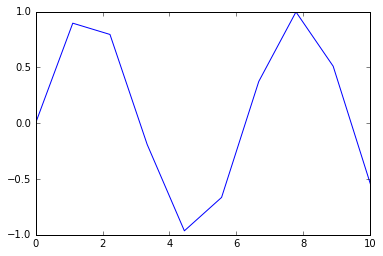

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline 

x = np.linspace(0, 10, 10)

y = np.sin(x)

plt.plot(x, y)

plt.show()

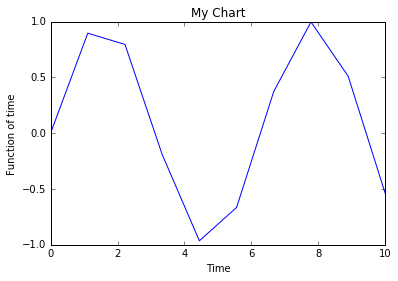

In [89]:
plt.plot(x, y)
plt.xlabel("Time")
plt.ylabel("Function of time")
plt.title("My Chart")
plt.show()

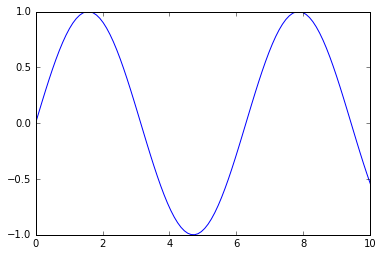

In [90]:
# example with more points

x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y)
plt.show()

#### Scatter plot

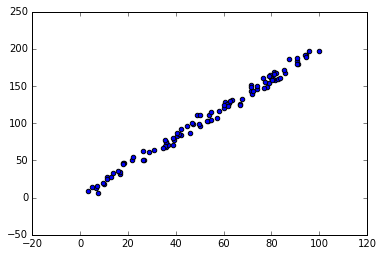

In [91]:
A = pd.read_csv("data_1d.csv", header=None).as_matrix()
x = A[:,0]
y = A[:,1]
plt.scatter(x, y)
plt.show()

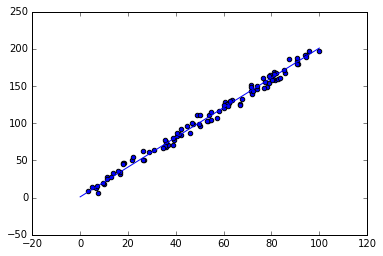

In [92]:
x_line = np.linspace(0, 100, 100)
y_line = 2*x_line + 1
plt.scatter(x, y)
plt.plot(x_line, y_line)
plt.show()

#### Histogram

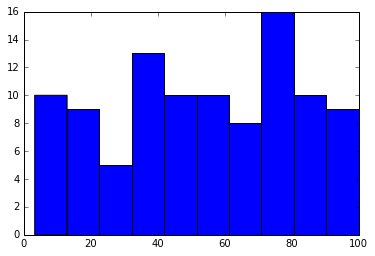

In [93]:
plt.hist(x)
plt.show()

(array([ 1064.,   990.,  1007.,   946.,   955.,  1026.,  1003.,  1031.,
          957.,  1021.]),
 array([  9.15639870e-05,   1.00081853e-01,   2.00072143e-01,
          3.00062432e-01,   4.00052722e-01,   5.00043011e-01,
          6.00033301e-01,   7.00023590e-01,   8.00013880e-01,
          9.00004169e-01,   9.99994459e-01]),
 <a list of 10 Patch objects>)

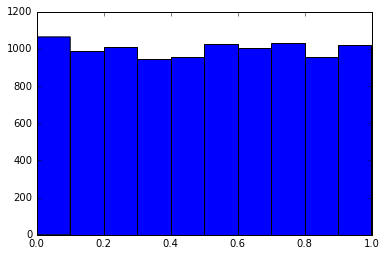

In [94]:
R = np.random.random(10000)
plt.hist(R)

(array([ 479.,  523.,  492.,  528.,  503.,  462.,  487.,  478.,  503.,
         543.,  507.,  501.,  515.,  517.,  501.,  502.,  481.,  482.,
         498.,  498.]),
 array([  5.58134936e-05,   5.00529748e-02,   1.00050136e-01,
          1.50047298e-01,   2.00044459e-01,   2.50041620e-01,
          3.00038782e-01,   3.50035943e-01,   4.00033104e-01,
          4.50030266e-01,   5.00027427e-01,   5.50024588e-01,
          6.00021750e-01,   6.50018911e-01,   7.00016072e-01,
          7.50013234e-01,   8.00010395e-01,   8.50007556e-01,
          9.00004718e-01,   9.50001879e-01,   9.99999041e-01]),
 <a list of 20 Patch objects>)

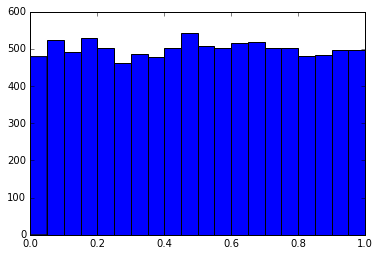

In [95]:
R = np.random.random(10000)
plt.hist(R, bins=20)

#### Plotting images

In [96]:
# data from MINST data set of character images

df = pd.read_csv("http://pjreddie.com/media/files/mnist_train.csv")
df.shape

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

In [97]:
M = df.as_matrix()
im = M[0, 1:]
im.shape

(3,)

In [98]:
im = im.reshape(28, 28)
im.shape

ValueError: total size of new array must be unchanged

TypeError: Image data can not convert to float

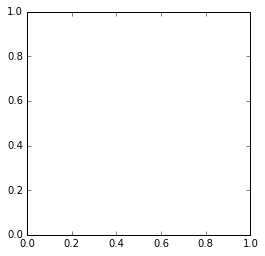

In [99]:
plt.imshow(im)

#### Scipy

Statistial functions

E.g., Guassian PDF:

<img src="gaussian_pdf.svg">

Spicy is much faster than building a program to calculate this.

In [100]:
from scipy.stats import norm

norm.pdf(0)

0.3989422804014327

In [101]:
# loc = mean, scale=standard deviation
norm.pdf(0, loc=5, scale=10)

0.035206532676429952

In [102]:
r = np.random.randn(10) # random sample from normal distribution
norm.pdf(r)

array([ 0.11646367,  0.04879466,  0.30908744,  0.30322757,  0.23442375,
        0.39693944,  0.25951602,  0.2968225 ,  0.35316701,  0.23229001])

#### Log Pdf

In [103]:
norm.logpdf(r)

array([-2.15017592, -3.02013431, -1.17413107, -1.1932717 , -1.4506249 ,
       -0.92397154, -1.34893684, -1.21462096, -1.04081422, -1.45976863])

#### CDF - cummulative distribution function

Integral of PDF from -inf to x

In [104]:
norm.pdf(0, loc=5, scale=10)

0.035206532676429952

In [105]:
r = np.random.randn(10)
norm.pdf(r)

array([ 0.08248632,  0.39663068,  0.26692785,  0.26642826,  0.29039682,
        0.39555436,  0.32126918,  0.0587736 ,  0.39892322,  0.17170135])

In [106]:
norm.logpdf(r)

array([-2.49512287, -0.9247497 , -1.32077688, -1.32265026, -1.23650695,
       -0.92746705, -1.13547594, -2.83406256, -0.9189863 , -1.76199864])

In [107]:
norm.cdf(r)

array([ 0.03790842,  0.45707442,  0.18499818,  0.81555845,  0.78726134,
        0.55195514,  0.74475798,  0.97483226,  0.50389925,  0.9029434 ])

#### Sampling from a Gaussian

(array([   1.,    2.,    1.,    1.,    1.,    5.,    0.,    0.,    0.,
           3.,    2.,    1.,    8.,    4.,    4.,    7.,   13.,    7.,
          19.,   20.,   12.,   40.,   36.,   51.,   33.,   57.,   46.,
          61.,   86.,   94.,   87.,  111.,  109.,  120.,  149.,  168.,
         198.,  180.,  192.,  220.,  226.,  285.,  240.,  276.,  269.,
         302.,  318.,  324.,  320.,  310.,  275.,  282.,  270.,  295.,
         310.,  284.,  249.,  257.,  248.,  241.,  226.,  212.,  205.,
         184.,  170.,  142.,  155.,  117.,  112.,   99.,   86.,  105.,
          69.,   69.,   59.,   51.,   46.,   35.,   23.,   25.,   14.,
          19.,    8.,    5.,    4.,    6.,    5.,    6.,    3.,    1.,
           2.,    2.,    2.,    1.,    0.,    0.,    0.,    1.,    0.,    1.]),
 array([-3.86099408, -3.7839867 , -3.70697931, -3.62997193, -3.55296455,
        -3.47595716, -3.39894978, -3.3219424 , -3.24493501, -3.16792763,
        -3.09092025, -3.01391286, -2.93690548, -2.8598981 , -2.7

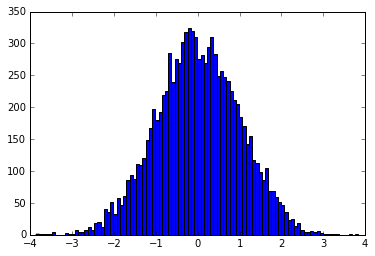

In [108]:
r = np.random.randn(10000)
plt.hist(r, bins=100)

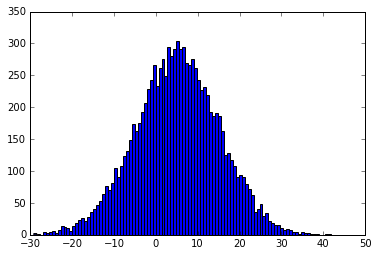

In [109]:
# Standard deviation = 10, mean = 5
r = 10*np.random.randn(10000) + 5
plt.hist(r, bins=100)
plt.show()

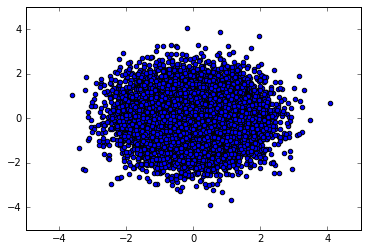

In [110]:
# 10,000 samples with dimension 2
r = np.random.randn(10000, 2)
plt.scatter(r[:,0], r[:,1])
plt.show()

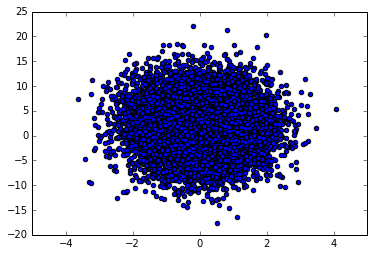

In [111]:
r[:,1] = 5*r[:,1] + 2
plt.scatter(r[:,0],r[:,1])

#### Sampling from a multivariate distribution

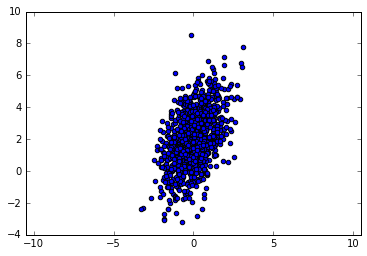

In [112]:
from scipy.stats import multivariate_normal as mvn

cov = np.array([[1, 0.8], [0.8, 3]])
mu = np.array([0,2])
r = mvn.rvs(mean=mu, cov=cov, size=1000)
plt.scatter(r[:,0],r[:,1])
plt.axis('equal')
plt.show()

#### FFT in numpy

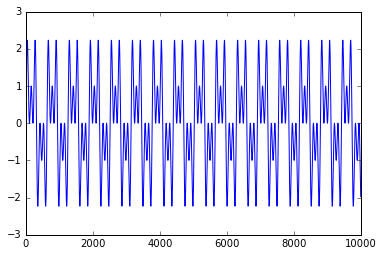

In [118]:
x = np.linspace(0, 100, 10000)
y = np.sin(x) + np.sin(3*x) + np.sin(5*x)
plt.plot(y)
plt.show()

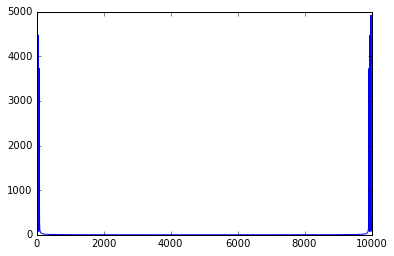

In [114]:
Y = np.fft.fft(y)
plt.plot( np.abs(Y) )
plt.show()

In [115]:
2*np.pi*16/100

1.0053096491487339

In [116]:
2*np.pi*48/100

3.015928947446201

In [117]:
2*np.pi*80/100

5.026548245743669